In [8]:
from DSEHW1 import DSELinearClassifier
import matplotlib.pyplot as plt

In [1]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None,
                          resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolor='black')
    
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='test set')

In [2]:
import numpy as np

class DSELinearClassifier(object):
    """DSELinearClassifier  classifier.
    
    Parameters
    ------------
    activation: string 
          values are ('Perceptron', 'Logistic', 'HyperTan').
    initial_weight: vector
        inital weight
    random_state : int
        Random number generator seed for random weight initialization.
    eta : float
        Learning rate (between 0.0 and 1.0)
    max_epochs : int
        Passes over the training dataset.
    
        
    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    cost_ : list
        Sum-of-squares cost function value in each epoch.
    
    """
    def __init__(self, activation, initial_weight, random_state=42, eta=0.01, max_epochs=50):
        self.eta = eta
        self.max_epochs = max_epochs
        self.random_state = random_state
        self._w= initial_weight
        self.activation = activation
    
    def fit(self, X, Y):
        """ Fit training data.
        
        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
            Training vectors, where n_examples
            is the number of examples and
            n_features is the number of features.
        y : array-like, shape = [n_examples]
            Target values.
        
        Returns
        -------
        self : object
        
        """
        
        self.cost_ = []
        self._fit_errors = []
        
        for i in range(self.max_epochs):
            errors = 0
            for x, y in zip(X,Y):
                z = self.net_input(x)
                yhat = 0
                if self.activation == 'Perceptron':
                    yhat = self.activation_linear(z)
                elif self.activation == 'Logistic':
                    yhat = self.activation_sigmoid(z)
                elif self.activation == 'HyperTan':
                    yhat = self.activation_tanh(z) 
                errors = (y - yhat)
                delta_w = self.eta*errors*x
                self._w = self._w + delta_w
            
            self._fit_errors.append(errors)
           
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self._w.T)
    
    def activation_linear(self, X):
        """Compute linear activation"""
        return X
    
    def activation_sigmoid(self, X):
        """logistic activation function"""
        return 1/(1+np.exp(-X))
    
    def activation_tanh(self, X):
        """Tanh activation function"""
        return (np.exp(X)-np.exp(-X))/(np.exp(X)+np.exp(-X))
    
    def predict(self, X):
        if self.activation == 'Perceptron':
            return np.where(self.net_input(X) >= 0.0, 1, -1)
        elif self.activation == 'Logistic':
            return np.where(self.net_input(X) >= 0.0, 0, 1)
        elif self.activation == 'HyperTan':
            return np.where(self.net_input(X) >= 0.0, 1, -1)
        

Seed your data with seed = 42 (initial random state.) Then compute
the classification report from sklearn for each of the three activations
on the synthetic data sets we created in the last probelem: two blobs
well separated, two blobs poorly separated and a blob and a circle. For
each case show the final classifier line, with the class regions colored
Red and blue as in the examples in the book, or sklearn. Color the
dots as before. As usual split train/test data and show performance
on both using classificatio_report for the three data sets.
g. For the three data sets show the fit plot the curve of errors with steps.
h. Try 3 different values of the learning rate each double the last. Plot
the path of errors.
i. This time run the three algorithms on the data sets with well separated
blobs but initialize the weights to be way off with “initial_weight =
(5,5)”. With your prior best learning rate, what do the error curves
look like?

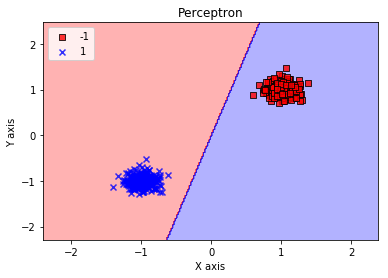

In [3]:
from sklearn.datasets import make_blobs
#np.seterr(divide='ignore', invalid='ignore')
seed=42
def generate_sample_data(n_samples, cluster_std, center_box):
    X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=cluster_std, centers=1, center_box=center_box, shuffle=True, random_state=seed)
    return X, y

#two blobs well separated
X1a, y1a = generate_sample_data(n_samples=250, cluster_std=0.125, center_box=(-1,-1))
X1b, y1b = generate_sample_data(n_samples=250, cluster_std=0.125, center_box=(1,1))

rgen = np.random.RandomState(seed)
initial_w = rgen.normal(loc=0.0, scale=0.01, size=2)
max_epochs = 500
X1 = np.vstack((X1a,X1b))
y1 = np.hstack((y1a+1, y1b-1))


dseln_percepton = DSELinearClassifier('Perceptron', initial_w, seed, max_epochs=max_epochs, eta=0.01)
dseln_logistic = DSELinearClassifier('Logistic', initial_w, seed, max_epochs=max_epochs, eta=0.01)
dseln_hyperTan = DSELinearClassifier('HyperTan', initial_w, seed, max_epochs=max_epochs, eta=0.01)
#Draw classification line
plot_decision_regions(X=X1, y=y1, classifier=dseln_percepton)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend(loc='upper left')
plt.title('Perceptron')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(
            X1, y1, test_size=0.33, random_state=seed)

dseln_percepton.fit(X_train, y_train)
dseln_hyperTan.fit(X_train, y_train)

Y_hat_percepton = dseln_percepton.predict(X_test)
print(classification_report(y_test, Y_hat_percepton))


Y_hat_hyperTan = dseln_hyperTan.predict(X_test)
print(classification_report(y_test, Y_hat_hyperTan))

X2 = np.vstack((X1a,X1b))
y2 = np.hstack((y1a, y1b+1)) 
X_train, X_test, y_train, y_test = train_test_split(
            X2, y2, test_size=0.33, random_state=seed)

dseln_logistic.fit(X_train, y_train)
Y_hat_logistic = dseln_logistic.predict(X_test)

print(classification_report(y_test, Y_hat_logistic))

             precision    recall  f1-score   support

         -1       1.00      1.00      1.00        80
          1       1.00      1.00      1.00        85

avg / total       1.00      1.00      1.00       165

             precision    recall  f1-score   support

         -1       1.00      1.00      1.00        80
          1       1.00      1.00      1.00        85

avg / total       1.00      1.00      1.00       165

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        85
          1       0.00      0.00      0.00        80

avg / total       0.00      0.00      0.00       165



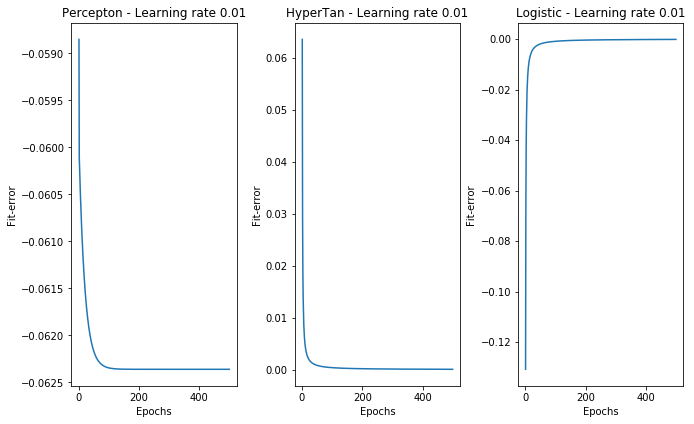

In [5]:
# ploat epoch and fit_error

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))
ax[0].plot(range(1, len(dseln_percepton._fit_errors) + 1),
          dseln_percepton._fit_errors)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Fit-error')
ax[0].set_title('Percepton - Learning rate 0.01')

ax[1].plot(range(1, len(dseln_hyperTan._fit_errors) + 1),
           dseln_hyperTan._fit_errors)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Fit-error')
ax[1].set_title('HyperTan - Learning rate 0.01')

ax[2].plot(range(1, len(dseln_logistic._fit_errors) + 1),
           dseln_logistic._fit_errors)
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Fit-error')
ax[2].set_title('Logistic - Learning rate 0.01')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()

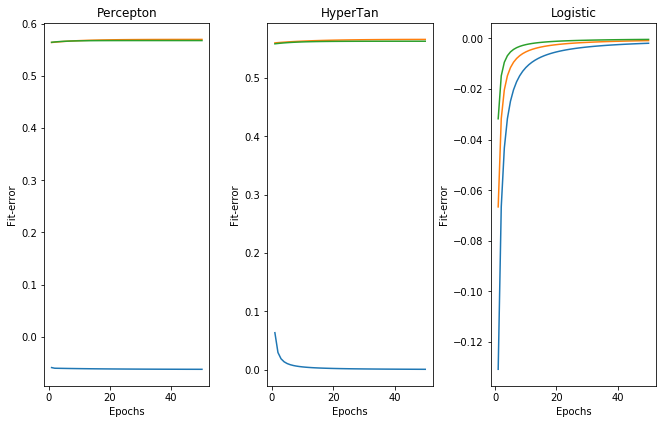

In [6]:
learning_rate = [0.01,0.02, 0.04]
max_epochs = 50
X_train, X_test, y_train, y_test = train_test_split(
            X1, y1, test_size=0.33, random_state=seed)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))
for i in range(3):
    dseln_percepton = DSELinearClassifier('Perceptron', initial_w, seed, max_epochs=max_epochs, eta=learning_rate[i])
    dseln_logistic = DSELinearClassifier('Logistic', initial_w, seed, max_epochs=max_epochs, eta=learning_rate[i])
    dseln_hyperTan = DSELinearClassifier('HyperTan', initial_w, seed, max_epochs=max_epochs, eta=learning_rate[i])
 
    dseln_percepton.fit(X_train, y_train)
    dseln_hyperTan.fit(X_train,  y_train)
    X_train, X_test, y_train, y_test = train_test_split(
            X2, y2, test_size=0.33, random_state=seed)
    dseln_logistic.fit(X_train,  y_train)
    
    ax[0].plot(range(1, len(dseln_percepton._fit_errors) + 1),
          dseln_percepton._fit_errors)
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Fit-error')
    ax[0].set_title('Percepton')

    ax[1].plot(range(1, len(dseln_hyperTan._fit_errors) + 1),
           dseln_hyperTan._fit_errors)
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Fit-error')
    ax[1].set_title('HyperTan')

    ax[2].plot(range(1, len(dseln_logistic._fit_errors) + 1),
           dseln_logistic._fit_errors)
    ax[2].set_xlabel('Epochs')
    ax[2].set_ylabel('Fit-error')
    ax[2].set_title('Logistic')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
plt.show()


Looking at the above fig it is clear that as learning rate increase  fit error increase

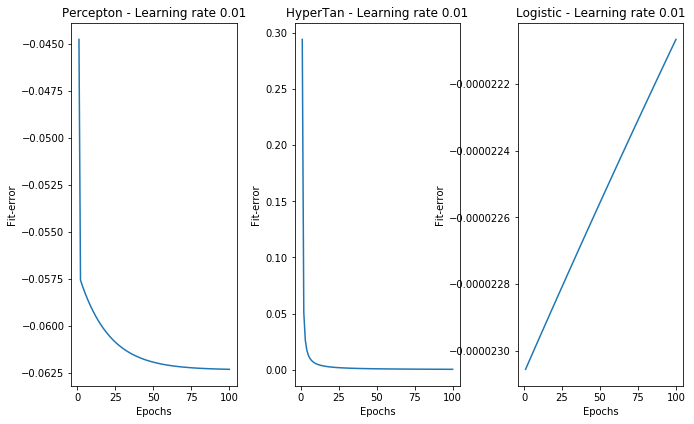

In [7]:
max_epochs = 100
initial_w =  np.array([5,5])
X_train, X_test, y_train, y_test = train_test_split(
            X1, y1, test_size=0.33, random_state=seed)

dseln_percepton = DSELinearClassifier('Perceptron', initial_w, seed, max_epochs=max_epochs, eta=0.01)
dseln_logistic = DSELinearClassifier('Logistic', initial_w, seed, max_epochs=max_epochs, eta=0.01)
dseln_hyperTan = DSELinearClassifier('HyperTan', initial_w, seed, max_epochs=max_epochs, eta=0.01)

dseln_percepton.fit(X_train, y_train)
dseln_hyperTan.fit(X_train, y_train)

X_train, X_test, y_train, y_test = train_test_split(
            X2, y2, test_size=0.33, random_state=seed)
dseln_logistic.fit(X_train,  y_train)


fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))
ax[0].plot(range(1, len(dseln_percepton._fit_errors) + 1),
          dseln_percepton._fit_errors)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Fit-error')
ax[0].set_title('Percepton - Learning rate 0.01')

ax[1].plot(range(1, len(dseln_hyperTan._fit_errors) + 1),
           dseln_hyperTan._fit_errors)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Fit-error')
ax[1].set_title('HyperTan - Learning rate 0.01')

ax[2].plot(range(1, len(dseln_logistic._fit_errors) + 1),
           dseln_logistic._fit_errors)
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Fit-error')
ax[2].set_title('Logistic - Learning rate 0.01')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
plt.show()
